# **Race & Average Income of 4 Neighborhoods: Boyle Heights, Pacific Palisades, San Pedro, and Westlake**
### In this notebook, I will explore the racial demographic and average income of 4 neighborhoods towards my final project with Mico O' Brien.
##### Estefany Garcia

### Import Libraries
First we import our libraries.

In [1]:
### for spatial data
import geopandas as gpd

### for plotting
import matplotlib.pyplot as plt

### for network analysis
import networkx as nx

### for street network analysis
import osmnx as ox

### for basemaps
import contextily as ctx

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


These will be used for various coding throughout the notebook.

### Upload Dataset: Census Tracts
We will then upload our census tract dataset from the U.S. Census Bureau. We will be calling our racial demographic data from census tracts: race. 

In [2]:
race=gpd.read_file('larace.geojson')

To get a better sense of what the dataset includes we will use the code .info() as well as .head()

In [3]:
race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B03002001         1005 non-null   float64 
 3   B03002001, Error  1005 non-null   float64 
 4   B03002002         1005 non-null   float64 
 5   B03002002, Error  1005 non-null   float64 
 6   B03002003         1005 non-null   float64 
 7   B03002003, Error  1005 non-null   float64 
 8   B03002004         1005 non-null   float64 
 9   B03002004, Error  1005 non-null   float64 
 10  B03002005         1005 non-null   float64 
 11  B03002005, Error  1005 non-null   float64 
 12  B03002006         1005 non-null   float64 
 13  B03002006, Error  1005 non-null   float64 
 14  B03002007         1005 non-null   float64 
 15  B03002007, Error  1005 non-null   float64 
 16  B03002008       

In [4]:
race.head(3)

geoid                                   name  B03002001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     4283.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             443.0     3095.0             354.0     2616.0             306.0   
1             334.0     3258.0             344.0     2882.0             358.0   
2             484.0     3731.0             465.0     2986.0             435.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0       19.0              15.0  ...              12.0      383.0   
1       74.0             102.0  ...              12.0       48.0   
2      198.0             165.0  ...              17.0      874.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0             311.0       74.0              52.0       34.0              28.0   
1              55.0        0.0              12.0        0.0              12.0   
2             477.0       81.0              80.0       48.0              62.0   

   B03002021  B03002021, Error  \
0       40.0              46.0   
1        0.0              12.0   
2       33.0              51.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  

[3 rows x 45 columns]

### Drop the County Row
When using census data, the first row apprears to be a repersentation of the entire city. We will proceed with dropping the first column. 

In [5]:
race = race.drop([0])

We will now verify that the first column has been dropped. 

In [6]:
race.head()

geoid                                   name  B03002001  \
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA     3458.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
1             334.0     3258.0             344.0     2882.0             358.0   
2             484.0     3731.0             465.0     2986.0             435.0   
3             276.0     2338.0             236.0     1812.0             271.0   
4             394.0     3587.0             363.0     3126.0             359.0   
5             377.0     2867.0             393.0     2271.0             355.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
1       74.0             102.0  ...              12.0       48.0   
2      198.0             165.0  ...              17.0      874.0   
3       87.0             107.0  ...              12.0      497.0   
4      205.0             232.0  ...              12.0       45.0   
5        9.0              15.0  ...              12.0      104.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
1              55.0        0.0              12.0        0.0              12.0   
2             477.0       81.0              80.0       48.0              62.0   
3             231.0       45.0              42.0       11.0              18.0   
4              38.0       28.0              32.0       28.0              32.0   
5              68.0        7.0              12.0        7.0              12.0   

   B03002021  B03002021, Error  \
1        0.0              12.0   
2       33.0              51.0   
3       34.0              39.0   
4        0.0              12.0   
5        0.0              12.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  
5  MULTIPOLYGON (((-118.32238 34.24963, -118.3221...  

[5 rows x 45 columns]

As we can see by the first column starting at 1 rather than 0, we have successfully dropped the first column. 

### Cleaning the Dataset
We will now proceed to cleaning up the census dataset. To begin, let's see what the headers are for each column in the dataset. 

In [7]:
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

By referencing the laracemetadata.json file, we can see what each number sequence represents. There is not a need for us to use all columns, we will now proceed to only keep relevent columns. 

In [8]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

We will now redefine what race means in our notebook. 

In [9]:
race = race[columns_to_keep]

To verify that our new specified columns are the only ones kept, we will run the code .head()

In [10]:
race.head()

geoid                                   name  B03002001  \
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA     3458.0   

   B03002002  B03002003  B03002004  B03002005  B03002006  B03002007  \
1     3258.0     2882.0       74.0       15.0      220.0        0.0   
2     3731.0     2986.0      198.0        0.0      486.0        0.0   
3     2338.0     1812.0       87.0        0.0      341.0        0.0   
4     3587.0     3126.0      205.0        0.0      194.0        0.0   
5     2867.0     2271.0        9.0       13.0      409.0        0.0   

   B03002008  B03002009  B03002012  \
1        0.0       67.0      147.0   
2       47.0       14.0     2616.0   
3        0.0       98.0     1364.0   
4        0.0       62.0      297.0   
5       28.0      137.0      591.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  
5  MULTIPOLYGON (((-118.32238 34.24963, -118.3221...

As we can see, we have sucessfully limited the data we will work with by specificying the columns. We will now proceed to rename our columns to make it easier to work with. To do this, we will list our columns again. 

In [11]:
list(race)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

We will now redefine our column names. 

In [12]:
race.columns = ['geoid',
 'name',
 'total',
 'non hispanic',
 'white',
 'black',
 'native',
 'asian',
 'pacific islander',
 'non hispanic some other race',
 'non hispanic two or more races',
 'hispanic',
 'geometry']

By using the code .head, we will verify if our new column names have been updated. 

In [13]:
race.head()

geoid                                   name   total  \
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  6347.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  3884.0   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA  3458.0   

   non hispanic   white  black  native  asian  pacific islander  \
1        3258.0  2882.0   74.0    15.0  220.0               0.0   
2        3731.0  2986.0  198.0     0.0  486.0               0.0   
3        2338.0  1812.0   87.0     0.0  341.0               0.0   
4        3587.0  3126.0  205.0     0.0  194.0               0.0   
5        2867.0  2271.0    9.0    13.0  409.0               0.0   

   non hispanic some other race  non hispanic two or more races  hispanic  \
1                           0.0                            67.0     147.0   
2                          47.0                            14.0    2616.0   
3                           0.0                            98.0    1364.0   
4                           0.0                            62.0     297.0   
5                          28.0                           137.0     591.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  
5  MULTIPOLYGON (((-118.32238 34.24963, -118.3221...

We have successfully updated our column names. 

### Normalizing the Data
We will now normalize our data below. 

In [14]:
race['percent non hispanic'] = race['non hispanic']/race['total']*100
race['percent hispanic'] = race['hispanic']/race['total']*100

In [15]:
race['percent white'] = race['white']/race['total']*100
race['percent black'] = race['black']/race['total']*100
race['percent native'] = race['native']/race['total']*100
race['percent asian'] = race['asian']/race['total']*100
race['percent pacific islander'] = race['pacific islander']/race['total']*100
race['percent non hispanic some other race'] = race['non hispanic some other race']/race['total']*100
race['percent non hispanic two or more races'] = race['non hispanic two or more races']/race['total']*100

To verify if we were able to successfully normalize our data we will verify with the code .head()

In [16]:
race.head()

geoid                                   name   total  \
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  3405.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  6347.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  3702.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  3884.0   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA  3458.0   

   non hispanic   white  black  native  asian  pacific islander  \
1        3258.0  2882.0   74.0    15.0  220.0               0.0   
2        3731.0  2986.0  198.0     0.0  486.0               0.0   
3        2338.0  1812.0   87.0     0.0  341.0               0.0   
4        3587.0  3126.0  205.0     0.0  194.0               0.0   
5        2867.0  2271.0    9.0    13.0  409.0               0.0   

   non hispanic some other race  ...  \
1                           0.0  ...   
2                          47.0  ...   
3                           0.0  ...   
4                           0.0  ...   
5                          28.0  ...   

                                            geometry  percent non hispanic  \
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...             95.682819   
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...             58.783677   
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...             63.155051   
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...             92.353244   
5  MULTIPOLYGON (((-118.32238 34.24963, -118.3221...             82.909196   

  percent hispanic  percent white  percent black  percent native  \
1         4.317181      84.640235       2.173275        0.440529   
2        41.216323      47.045848       3.119584        0.000000   
3        36.844949      48.946515       2.350081        0.000000   
4         7.646756      80.484037       5.278064        0.000000   
5        17.090804      65.673800       0.260266        0.375940   

   percent asian  percent pacific islander  \
1       6.461087                       0.0   
2       7.657161                       0.0   
3       9.211237                       0.0   
4       4.994851                       0.0   
5      11.827646                       0.0   

   percent non hispanic some other race  \
1                              0.000000   
2                              0.740507   
3                              0.000000   
4                              0.000000   
5                              0.809717   

   percent non hispanic two or more races  
1                                1.967695  
2                                0.220577  
3                                2.647218  
4                                1.596292  
5                                3.961828  

[5 rows x 22 columns]

We have successfully normalized our data. 

### Upload Dataset: Neighborhood Boundaries
I will upload neighborhood boandaries from the LA Times Neighborhood Boundaries Dataset. I will be calling this dataset: neighborhood. 

In [17]:
neighborhoods=gpd.read_file('neighborhoods.geojson')

To get a better sense of what this dataset includes, I will use the code .info() 

In [18]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  114 non-null    int64   
 1   name      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.8+ KB


Another way of initailly exploring the data is my using the code .head. I have added (3) to only look at the first 3 rows. 

In [19]:
neighborhoods.head(3)

OBJECTID               name  \
0         1    Adams-Normandie   
1         2             Arleta   
2         3  Arlington Heights   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...

### Upload Dataset: Median Household Income
I will also bring in census tract information that will share median household income data within Los Angeles from 2019. I will be calling this dataset: income.

In [20]:
income=gpd.read_file('income.geojson')

To get a better sense of the data we are working with, I use the code .info() 

In [21]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B19013001         2311 non-null   float64 
 3   B19013001, Error  2307 non-null   float64 
 4   geometry          2347 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 91.8+ KB


.head is another code to look at the top of the dataset. By specifying (5) rows, we look at that specified amount. 

In [22]:
income.head(5)

geoid                                   name  B19013001  \
0        05000US06037                 Los Angeles County, CA    68044.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    44083.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    43713.0   

   B19013001, Error                                           geometry  
0             347.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1           16806.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2            9796.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3            9483.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4            4639.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...

We will then proceed to look at the column titles. 

In [23]:
list(income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

### Clean the Dataset
As we can see, there is a need to clean the columns we want to use. We specify the columns we want to work with by using the code columns_to_keep. As I have already used the code columns to keep before, I will add income to the code to diferenciate it from the previous one. 

In [24]:
columns_to_keep_income = ['geoid',
 'name',
 'B19013001',
 'geometry']

We then respecify what income will mean moving forward. 

In [25]:
income = income[columns_to_keep_income]

To verify if we have successfully updated our dataset, to only includes columns we want to work with, the code .head let's us see the top rows. I have specified 3 rows to just look at a few. I have found that specifying 3 has been helpful for me to control how many rows apprear, making it easier for me to review my notebook from top to bottom when needed. 

In [26]:
income.head(3)

geoid                                   name  B19013001  \
0        05000US06037                 Los Angeles County, CA    68044.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    63534.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    90389.0   

                                            geometry  
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...

I will now rename the column names. This information can be found in the metadata_household income.json file.

In [27]:
income.columns = ['geoid',
 'name',
 'median household income in the past 12 months',
 'geometry']

To verify if we have successfully updated the column names we will look at the top of the dataset using the code .head(3).

We have successfully updated the column names.

In [28]:
income.head(3)

geoid                                   name  \
0        05000US06037                 Los Angeles County, CA   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   

   median household income in the past 12 months  \
0                                        68044.0   
1                                        63534.0   
2                                        90389.0   

                                            geometry  
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...

There is a need to delete the first column of the dataset that is county summary information. 

In [29]:
income = income.drop([0])

We verify if we have successfully dropped the first column. 

In [30]:
income.head(3)

geoid                                   name  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   

   median household income in the past 12 months  \
1                                        63534.0   
2                                        90389.0   
3                                        44083.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...

We have successfully dropped the first column. 

### Merging the Data: Average Household Income Per Neighborhood
For the final project, I will be gathering average houehold income per neighborhoods we are assessing: Boyle Heights, Pacific Palisades, San Pedro, and Westlake. To begin, I will  bring back the neighborhood and income datasets to remind us of the variables we will be working with. I will review the 2 datasets using .info & .head(3) 

In [31]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  114 non-null    int64   
 1   name      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.8+ KB


In [32]:
neighborhoods.head(3)

OBJECTID               name  \
0         1    Adams-Normandie   
1         2             Arleta   
2         3  Arlington Heights   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...

In [33]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 1 to 2346
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   geoid                                          2346 non-null   object  
 1   name                                           2346 non-null   object  
 2   median household income in the past 12 months  2310 non-null   float64 
 3   geometry                                       2346 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 91.6+ KB


In [34]:
income.head(3)

geoid                                   name  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   

   median household income in the past 12 months  \
1                                        63534.0   
2                                        90389.0   
3                                        44083.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...

We can also see the initial distribution of the dataset with a histogram. 

<AxesSubplot:ylabel='Frequency'>

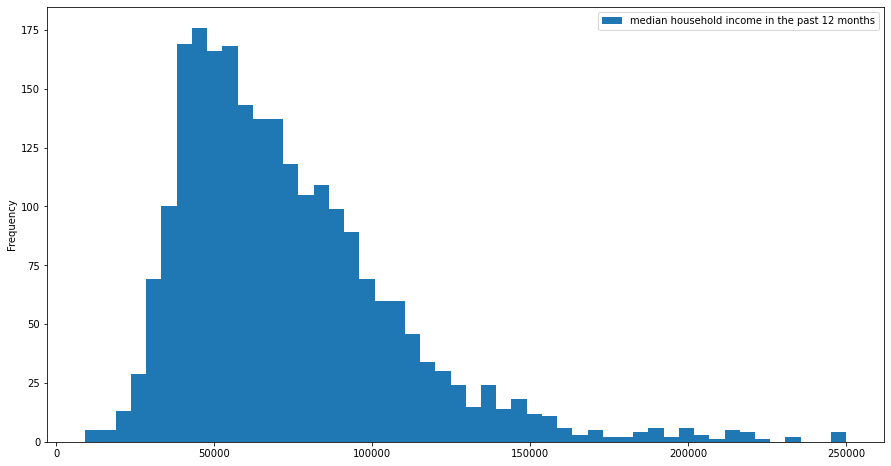

In [35]:
income.plot.hist(figsize=(15,8),bins=50)

### Make Sure Both Datasets Are Projected on the Same CRS
To begin we want to ensure that both of our datasets, "neighborhoods" and "income", are projected on the same CRS. I will start by bringing in our housing income data. 

In [36]:
points = income.copy()

In [37]:
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

I will now bring in our neighborhood boundaries data. 

In [38]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
points['geometry'] = points['geometry'].centroid

/tmp/ipykernel_193/3912728631.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points['geometry'] = points['geometry'].centroid


We will now use the code sjoin to do a spacial join between the two datasets.

In [40]:
neighbrohoods_with_income = gpd.sjoin(income, neighborhoods, how="left", op='within')

Now we will verify if we have successfully joined the two datasets by using our .head code. I only want to see the top 3 rows and specify that by adding (3) to the code. 

In [41]:
neighbrohoods_with_income.head(3)

geoid                              name_left  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   

   median household income in the past 12 months  \
1                                        63534.0   
2                                        90389.0   
3                                        44083.0   

                                            geometry  index_right  OBJECTID  \
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...         92.0      93.0   
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...          NaN       NaN   
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...         92.0      93.0   

  name_right  
1    Tujunga  
2        NaN  
3    Tujunga

We will now continue the join process. 

In [42]:
income_add = neighbrohoods_with_income.dissolve(by='name_right', aggfunc='mean')

In [43]:
income_add.reset_index(inplace=True)

In [44]:
income_add= income_add.rename(columns = {'name_right':'name_right'})

To verify our join we will use the code .head()

In [45]:
income_add.head()

name_right                                           geometry  \
0         Adams-Normandie  POLYGON ((-118.29915 34.03273, -118.29807 34.0...   
1       Arlington Heights  POLYGON ((-118.32366 34.04585, -118.32334 34.0...   
2  Baldwin Hills/Crenshaw  POLYGON ((-118.34724 34.01313, -118.34740 34.0...   
3           Boyle Heights  POLYGON ((-118.21885 34.02907, -118.21877 34.0...   
4     Broadway-Manchester  POLYGON ((-118.28000 33.93113, -118.27992 33.9...   

   median household income in the past 12 months  index_right  OBJECTID  
0                                   34823.500000          0.0       1.0  
1                                   36488.000000          2.0       3.0  
2                                   27862.333333          4.0       5.0  
3                                   43173.866667          9.0      10.0  
4                                   35114.000000         11.0      12.0

We have successfully joined the neighborhood and income datasets. 

### Assessing Average Household Income: Boyle Heights
We will now proceed to collect average household incomes per neighborhood. We will begin with Boyle Heights. For this notebook, we will refer to Boyle Heights as bh. 

In [46]:
bh = income_add[income_add['name_right'] == 'Boyle Heights']

We will use .head() to see the median household income of Boyle Heights. 

In [47]:
bh.head()

name_right                                           geometry  \
3  Boyle Heights  POLYGON ((-118.21885 34.02907, -118.21877 34.0...   

   median household income in the past 12 months  index_right  OBJECTID  
3                                   43173.866667          9.0      10.0

As we can see the median household income of Boyle Heights is $43,173.

### Assessing Average Household Income: Pacific Palisades
We will now proceed to finding the median household income for Pacific Palisades

In [48]:
pp = income_add[income_add['name_right'] == 'Pacific Palisades']

We will use .head() to see the median household income for Pacific Palisades. 

In [49]:
pp.head()

name_right                                           geometry  \
38  Pacific Palisades  MULTIPOLYGON (((-118.52900 34.05014, -118.5289...   

    median household income in the past 12 months  index_right  OBJECTID  
38                                       218674.0         68.0      69.0

As you can see the median household income of Pacific Palisades is $218,674.

### Assessing Average Household Income: San Pedro
We will now proceed to finding the median household income for San Pedro. 

In [50]:
sp = income_add[income_add['name_right'] == 'San Pedro']

We will use the code .head() to see the median household income for San Pedro. 

In [51]:
sp.head()

name_right                                           geometry  \
45  San Pedro  POLYGON ((-118.29282 33.72136, -118.29279 33.7...   

    median household income in the past 12 months  index_right  OBJECTID  
45                                      49622.875         79.0      80.0

As you can see the median household income for San Pedro is $49,623.

### Assessing Average Household Income: Westlake
We will now proceed to finding the median household income for Westlake.

In [52]:
wl = income_add[income_add['name_right'] == 'Westlake']

We will use the code .head() to see the median household income of Westlake. 

In [53]:
wl.head()

name_right                                           geometry  \
65   Westlake  POLYGON ((-118.27140 34.05350, -118.27166 34.0...   

    median household income in the past 12 months  index_right  OBJECTID  
65                                   38133.052632        106.0     107.0

As you can see the median household income of Westlake is $38,133.

### Historgram: Income Across 4 Neighborhoods 
We will now be creating a histogram with the 4 neighborhood median incomes to be able to easily compare then to eachother. 

In [54]:
bh_pp = bh.append(pp)

In [55]:
bh_pp_sp = bh_pp.append(sp)

In [56]:
bh_pp_sp_wl = bh_pp_sp.append(wl)

In [57]:
histo = px.bar(bh_pp_sp_wl, x='name_right',
               y="median household income in the past 12 months",
               title='Median Household Income Across Neighborhoods',
               labels={
                   'name_right':'Neighborhoods', 'income' : 'median household income in the past 12 months'}
              )

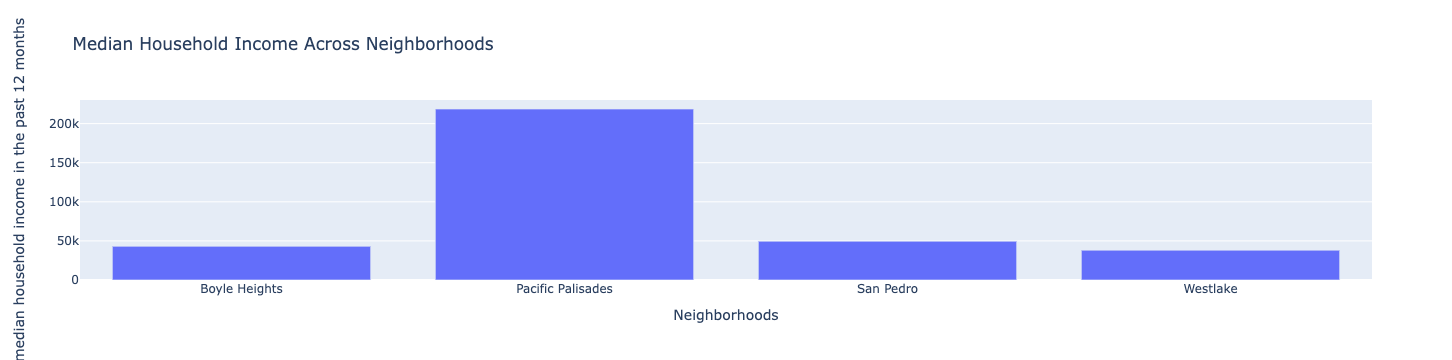

In [58]:
histo.show()

In [59]:
histo.write_html("histo_income.html")

### Additional Map Needed for EsriStorymap
The exploration and maps in this notebook will be used towards an Esri Storymap with Mica. There is a need to also produce a map of parks. Below will include that code to bring in the data and produce a map for our Esri Storymap. 

In [60]:
greenspace=gpd.read_file('park_boundaries.geojson')

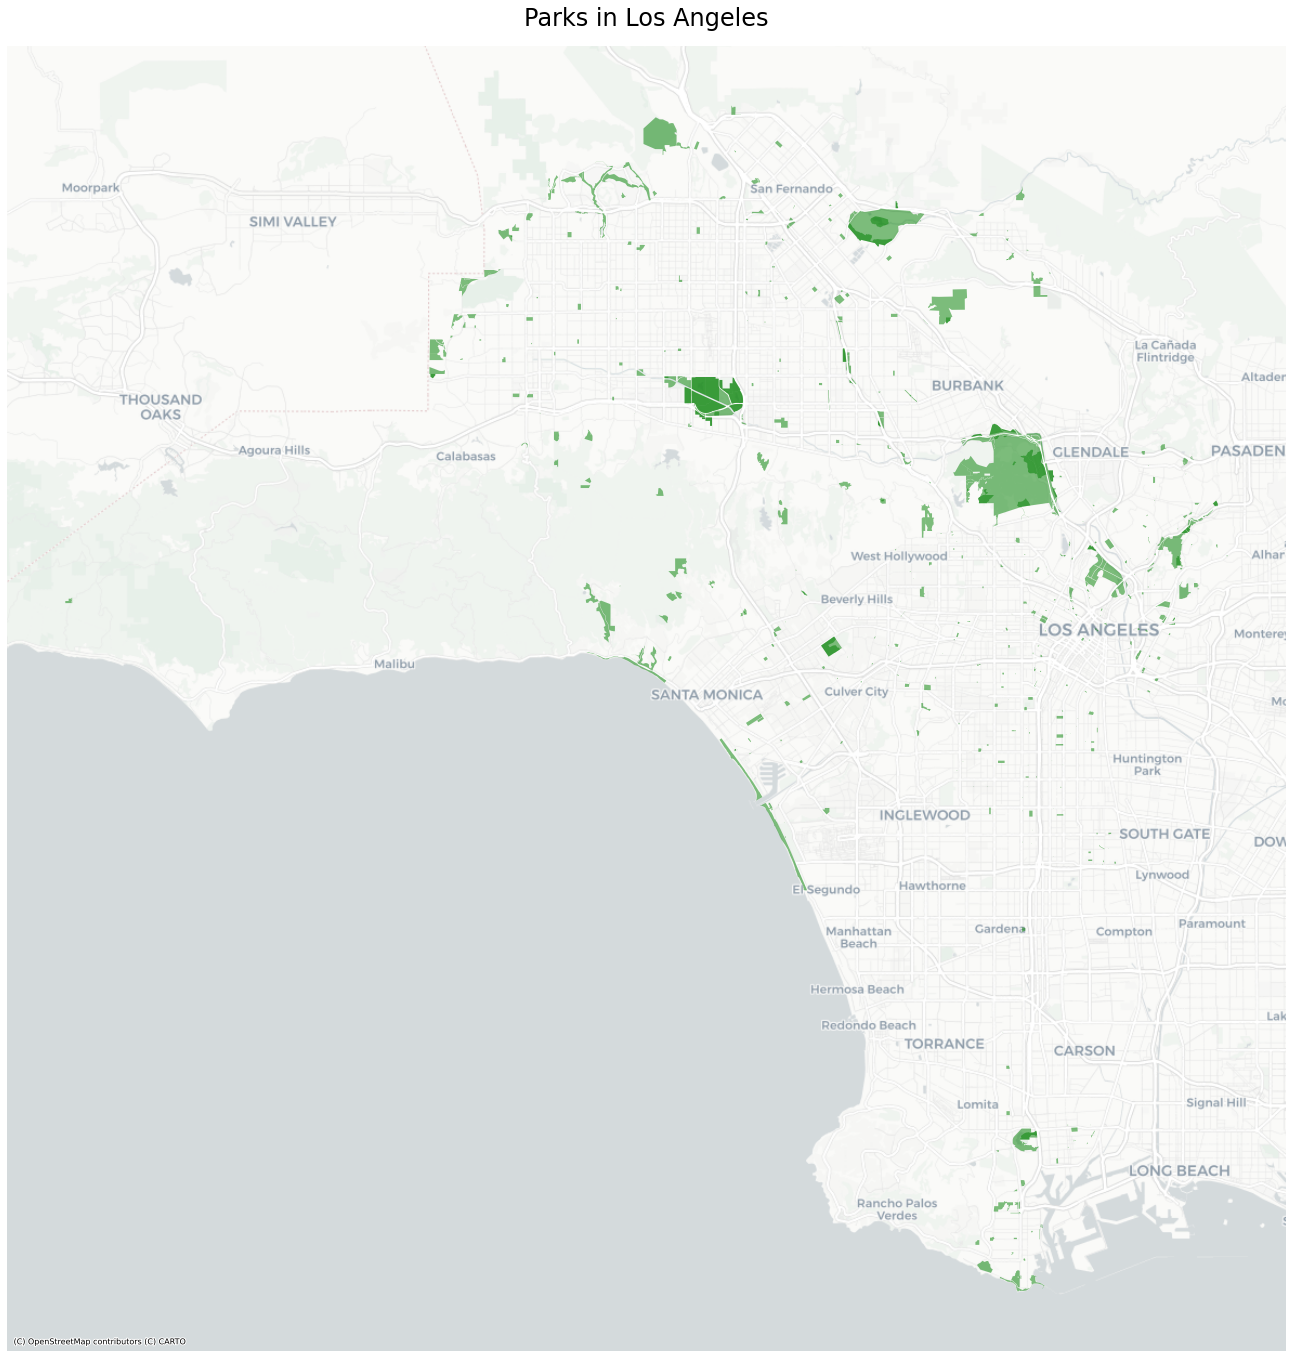

In [61]:
gdf_web_mercator = greenspace.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24,24))
gdf_web_mercator.plot(
                        ax=ax,
                        color="green",
                        alpha=0.5
)

ax.axis('off')

ax.set_title('Parks in Los Angeles',fontsize=24,pad=20)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

We have successfully created our map with park boundaries within the city of Los Angeles. 